<a href="https://colab.research.google.com/github/vjbarayuga/Week7-Classification_Models/blob/main/ClassificationMetricsSol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# import models
from sklearn.linear_model import LogisticRegression
# import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve, confusion_matrix

In [3]:
# load the dataset

df = pd.read_csv('/content/drive/MyDrive/Coding_DOJO-Data_Science_Bootcamp/04_Classification_Models/DATASET/bank_modified.csv')
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [5]:
# check target distribution
df['y_yes'].value_counts(normalize = True)

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

In [6]:
# Arrange data into features matrix & target vector
X = df.drop(columns = 'y_yes')
y = df['y_yes']

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [8]:
# baseline model
y_test.value_counts(normalize = True)

0    0.885041
1    0.114959
Name: y_yes, dtype: float64

In [9]:
# Standardize Data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# I'm going to use gridsearch to find the best hyperparameters for this model
# Feel free to research this on your own to learn more about this technique
params = {'penalty': ['l1', 'l2'],
          'C': [0.0001, 0.001, 0.01],
          'class_weight': [None, 'balanced']}

In [11]:
# logistic regression 
log_reg = LogisticRegression(solver = 'liblinear')

# grid search to find best hyperparameters
gs = GridSearchCV(log_reg, params, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [12]:
# here are the best hyperparameters based on the ones I tried
gs.best_estimator_

LogisticRegression(C=0.01, solver='liblinear')

In [13]:
# Accuracy:
print('Training accuracy:', gs.score(X_train, y_train))
print('Test accuracy:', gs.score(X_test, y_test))

Training accuracy: 0.8922250316055625
Test accuracy: 0.8872512896094326


In [14]:
# save predictions
preds = gs.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


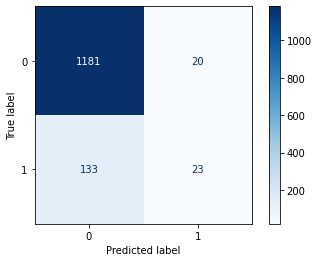

In [15]:
plot_confusion_matrix(gs, X_test, y_test,
                      cmap = 'Blues',
                      values_format = 'd');

In [16]:
# Sensitivity:

# Save confusion matrix:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

sensitivity = tp/ (tp + fn)

print('Sensitivity:', sensitivity)

Sensitivity: 0.14743589743589744


In [17]:
# Specificity:
specificity = tn / (tn + fp)

print('Specificity:', specificity)

Specificity: 0.9833472106577852


In [18]:
# AUC ROC
print('AUC ROC:', roc_auc_score(y_test, gs.predict_proba(X_test)[:,1]))

AUC ROC: 0.848625077392771


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


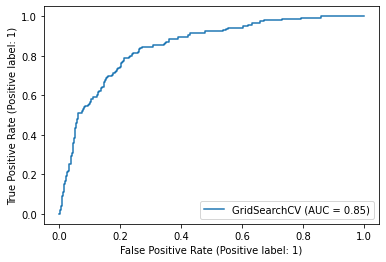

In [19]:
# Plot ROC curve
plot_roc_curve(gs, X_test, y_test);